## Problem

The aim of this analysis is to build  regression models that can predict house prices with the greatest accuracy possible. The results can inform home owners interested in selling their homes about the most important factors to consider for improving sale prices.

In [486]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [487]:
# loading data
df=pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### Data Understanding

In [488]:
class dataUnderstanding(object):
      
      """ A class that does basic data understanding"""

      def __init__(self, df):
        self.info = df.info
        self.shape = df.shape
        self.describe = df.describe()
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()
        self.types = df.dtypes

In [489]:
# instantiate the class
understanding = dataUnderstanding(df)

In [490]:
# shape of the dataset
print(f"shape:{understanding.shape}")

shape:(21597, 21)


There are 21597 rows and 21 columns

In [491]:
# info
print(understanding.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [492]:
# checking for duplicates
print(f"duplicates;{understanding.duplicates}")

duplicates;0


There are no duplicates

In [493]:
#checking for the missng values
print(understanding.types)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [494]:
understanding.missing

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are 2376 missing values in waterfront column, 63 in the view column and 3842 in the yr_renovated column

### Data Preparation

#### 2.1 Completeness
Taking care of missing values


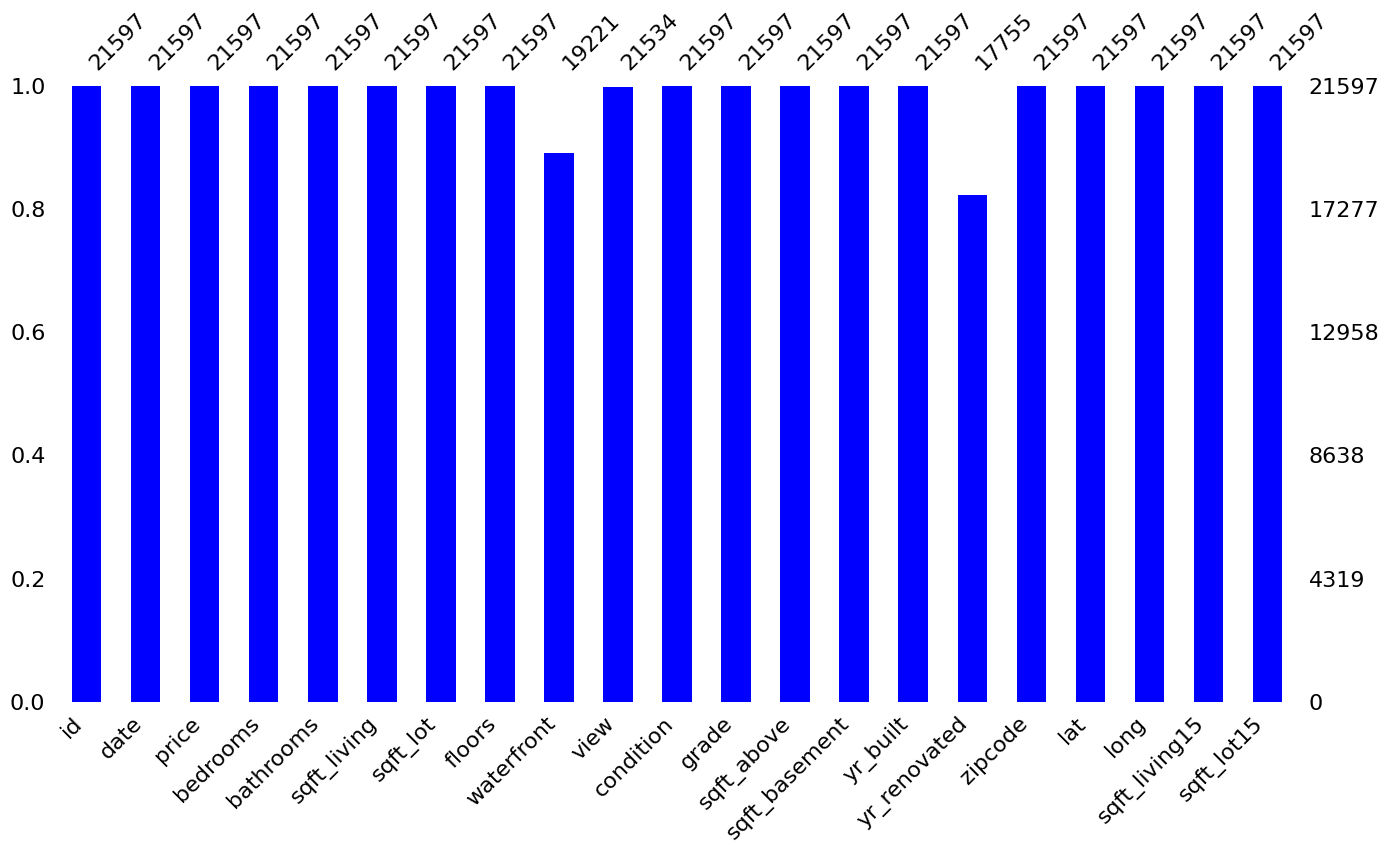

In [495]:
import missingno as msno
import seaborn as sns
pd.set_option("display.max_columns", 21)
fig, ax = plt.subplots(figsize=(16,8))
msno.bar(df=df, color="blue", ax=ax)
# plt.suptitle("Percentage Completeness")
plt.show()

In [496]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [497]:
# handling null values in waterfront column
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
df["waterfront"]=imp.fit_transform(df[["waterfront"]])

In [498]:
#inspecting value counts of view column
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [499]:
# handling null values in the view column
imp = SimpleImputer(strategy='most_frequent')
df["view"]=imp.fit_transform(df[["view"]])

In [500]:
#inspecting valuecounts of yr renovated column
df['yr_renovated'].value_counts()


0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [501]:
# removing null values in yr renovated column
df['yr_renovated']=df['yr_renovated'].fillna(value=0)

In [502]:
understanding=dataUnderstanding(df)
understanding.missing

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values

#### 2.2 Validity
 We will be checking if data is in the correct format

In [503]:
# dropping the id column 
df.drop('id', axis=1, inplace=True)

In [504]:
df['view'].astype('category')
type('view')

str

In [505]:
# cast condition as category
df['condition']=df['condition'].astype('category')
type('condition')

str

In [506]:
# correct date type
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [507]:
df['year'] = (df['date']).dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015


In [508]:
df['date'].dt.month

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: date, Length: 21597, dtype: int64

In [509]:
#dictionary that maps months to their season
seasons = {1:'Winter',
           2:'Winter',
           3:'Spring',
           4:'Spring',
           5:'Spring',
           6:'Summer',
           7:'Summer',
           8:'Summer',
           9:'Fall',
           10:'Fall',
           11:'Fall',
           12:'Winter'}

# Create a new column that contains the season that the movie was released in
df['season'] = df['date'].dt.month.map(seasons)

df.head() # Preview the updated 'release_time_df' DataFrame

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,season
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,Fall
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,Winter
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,Winter
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,Winter
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,Winter


In [510]:
area= df[['sqft_living','sqft_above', 'sqft_basement']]
area

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0
...,...,...,...
21592,1530,1530,0.0
21593,2310,2310,0.0
21594,1020,1020,0.0
21595,1600,1600,0.0


So we can drop sqft_above and sqft -basement


In [511]:
# Drop columns 'sqft_above' and 'sqft_basement'
df = df.drop(columns=['sqft_above', 'sqft_basement', 'year', 'date'])

# Print the updated dataframe
print(df)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

      waterfront  view  condition          grade  yr_built  yr_renovated  \
0             NO  NONE    Average      7 Average      1955           0.

In [512]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [513]:
df['grade'].replace(to_replace =('11 Excellent', '12 Luxury', '13 Mansion', '10 Very Good'),
                                      value ='Good', inplace=True)
df['grade'].replace(to_replace =('8 Good', '7 Average', '9 Better', '6 Low Average'),
                                      value ='Average', inplace=True) 
df['grade'].replace(to_replace =('3 Poor', '4 Low', '5 Fair'),
                                      value ='Poor', inplace=True)

In [514]:
df['grade'].value_counts()

Average    19692
Good        1635
Poor         270
Name: grade, dtype: int64

In [515]:
df['grade'].astype('category')

0        Average
1        Average
2        Average
3        Average
4        Average
          ...   
21592    Average
21593    Average
21594    Average
21595    Average
21596    Average
Name: grade, Length: 21597, dtype: category
Categories (3, object): ['Average', 'Good', 'Poor']

### Exploratory Data Analysis

#### univariate analysis

 It is used to describe and summarize the characteristics of a single variable, such as its central tendency (mean, median, mode), dispersion (range, variance, standard deviation), and distribution (frequency, histogram). Univariate analysis is often the first step in exploring and understanding a dataset before moving on to more complex methods of analysis.
 

In [516]:
# EDA class
class EdaAnalysis:
    
    def univariate(self,df,col1):
        """ A function that does univariate analysis"""
        plt.figure(figsize=(10,8))
        sns.countplot(x=col1,data=df)
        plt.title(f'Annalysis of {col1}')
        plt.xlabel(col1)
        plt.xticks(rotation=45)
        plt.show()
        
    def bivariate(self,df,col1, col2):
        """ A function that does bivariate analysis"""
        plt.figure(figsize=(10,8))
        sns.countplot(x=col1, data= df,hue=col2)
        plt.title(f'{col1} on {col2}')
        plt.ylabel(f'count of{col1}')
        plt.show()

    def multivariate_analysis(self, df):
      
        """Perform multivariate analysis on the data"""
        # Calculate the pairwise Pearson correlation coefficients for all columns
        corr_matrix = df.corr()
        # Plot a heatmap to visualize the correlations
        sns.heatmap(corr_matrix)

        # class ExploratoryDataAnalysis:
#     def __init__(self, data):
#         self.data = data
#     def univariate_analysis(self, data, column1):
#         """Perform univariate analysis on a single column of the data"""
#         # Calculate basic statistics for the column
#         mean = self.data[column1].mean()
#         median = self.data[column1].median()
#         mode = self.data[column1].mode()
#         std = self.data[column1].std()
#         min_value = self.data[column1].min()
#         max_value = self.data[column1].max()
#         # Plot a bar graphs to visualize the distribution of the data
#         plt.figure(figsize=(16,8))
#         sns.countplot(x= column1,data=data)
#         plt.title(f'No of images per {column1}')
#         plt.xlabel(column1)
#         plt.xticks(rotation=45)
#         plt.show()
# #         # Return a dictionary with the calculated statistics
#         return {
#             'mean': mean,
#             'median': median,
#             'mode': mode,
#             'std': std,
#             'min': min_value,
#             'max': max_value
#         }
#     def bivariate_analysis(self, data, column1, column2):
#         """Perform bivariate analysis between two columns of the data"""
#         # Calculate the Pearson correlation coefficient between the two columns
# #         corr = self.data[column1].corr(self.data[column2])
#         # Plot a scatter plot to visualize the relationship between the two columns
#         plt.figure(figsize=(16,8))
#         sns.countplot(x=col1, data= df,hue=col2)
#         plt.title(f'{col1} on {col2}')
#         plt.ylabel(f'count of{col1}')
#         # Return the calculated correlation coefficient
# #         return corr
#     def multivariate_analysis(self):
#         """Perform multivariate analysis on the data"""
#         # Calculate the pairwise Pearson correlation coefficients for all columns
#         corr_matrix = self.data.corr()
#         # Plot a heatmap to visualize the correlations
#         sns.heatmap(corr_matrix)

In [517]:
# instantiate 
graph = EdaAnalysis()

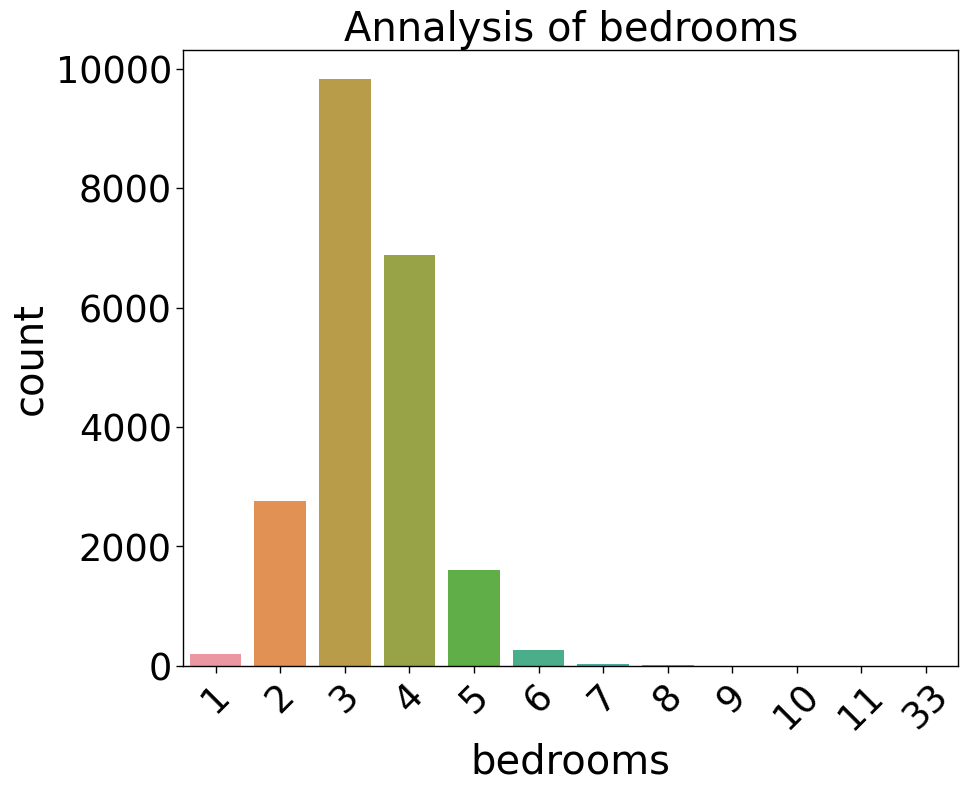

In [518]:
graph.univariate(df, 'bedrooms')

Houses with three bedrooms has the highest count, followed by 4 bedroom and the n 2 bedroom houses.

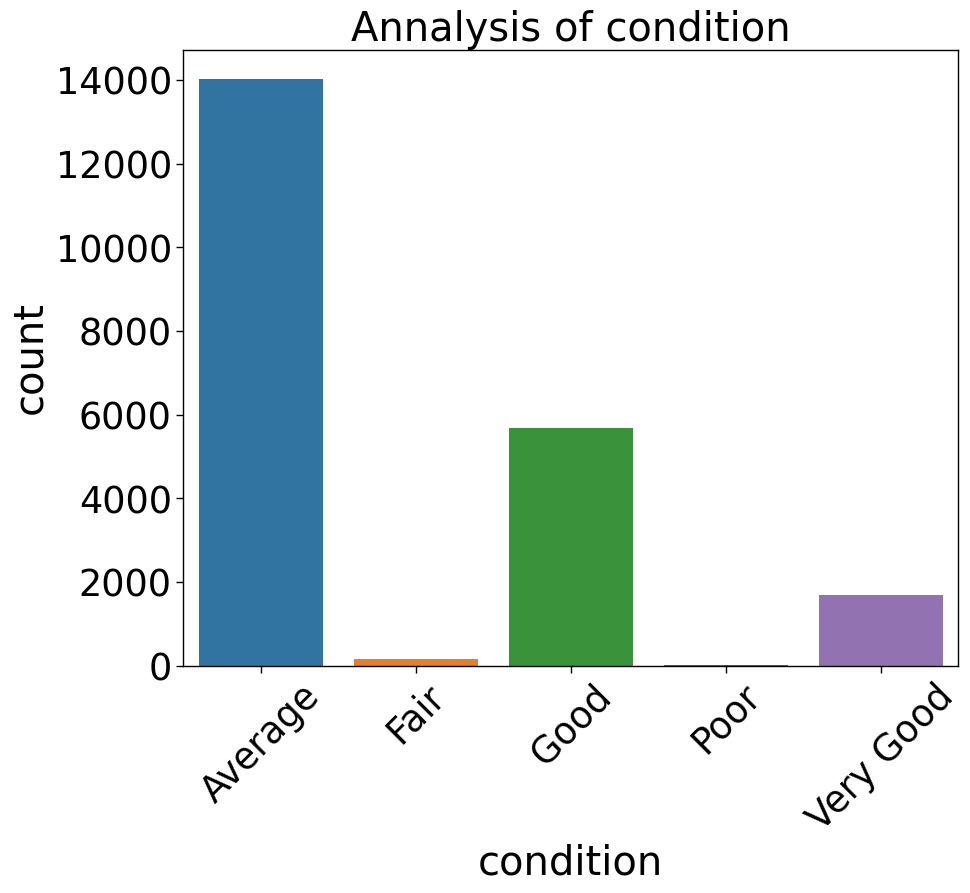

In [519]:
graph.univariate(df, 'condition')

Many houses are of Average condition. We have few houses with poor condition


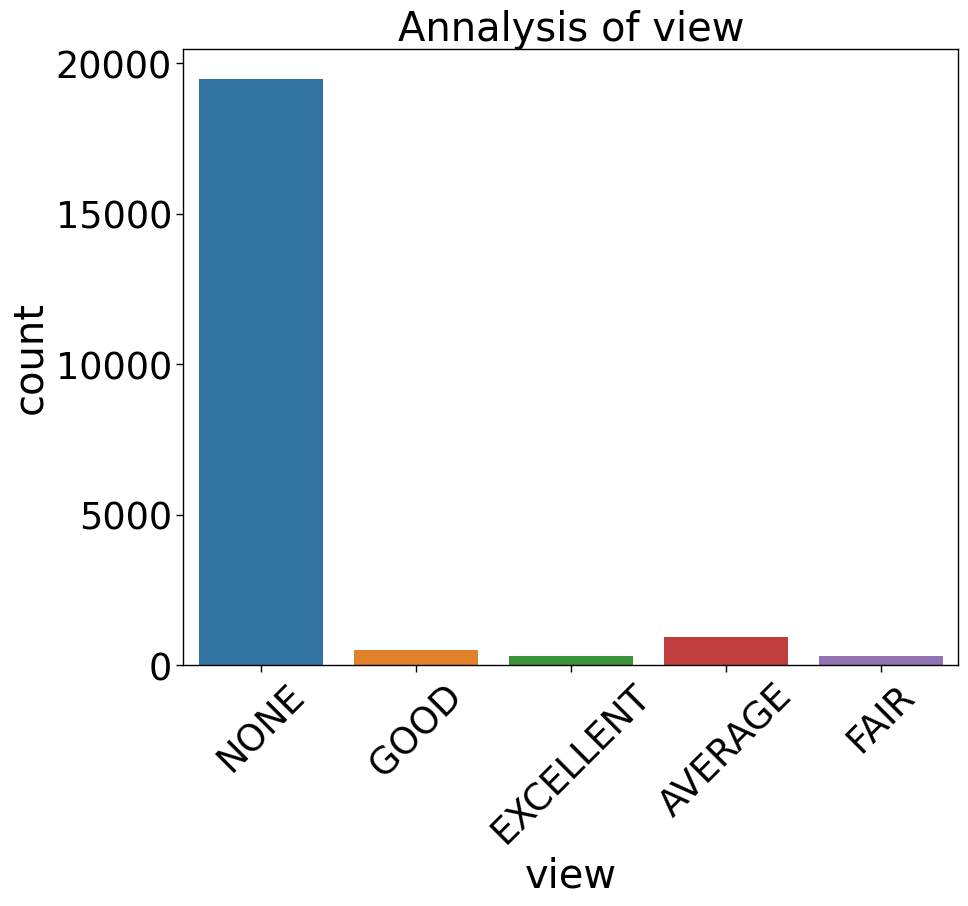

In [520]:
graph.univariate(df, 'view')

Many houses have no view

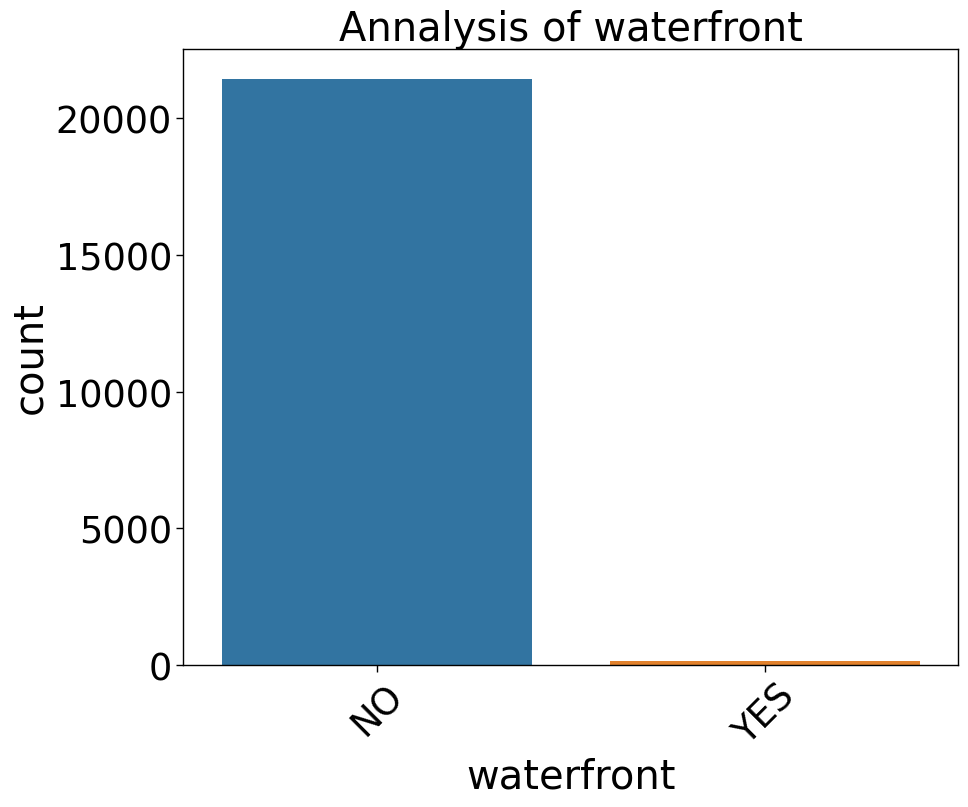

In [521]:
graph.univariate(df, 'waterfront')

Houses with no waterfront have the highest count

In [522]:
#rounding off the bathroom column to the nearest whole numbers
df["bathrooms"] = df["bathrooms"].round()

print(df)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3        1.0         1180      5650     1.0   
1      538000.0         3        2.0         2570      7242     2.0   
2      180000.0         2        1.0          770     10000     1.0   
3      604000.0         4        3.0         1960      5000     1.0   
4      510000.0         3        2.0         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3        2.0         1530      1131     3.0   
21593  400000.0         4        2.0         2310      5813     2.0   
21594  402101.0         2        1.0         1020      1350     2.0   
21595  400000.0         3        2.0         1600      2388     2.0   
21596  325000.0         2        1.0         1020      1076     2.0   

      waterfront  view  condition    grade  yr_built  yr_renovated  zipcode  \
0             NO  NONE    Average  Average      1955           0.0  

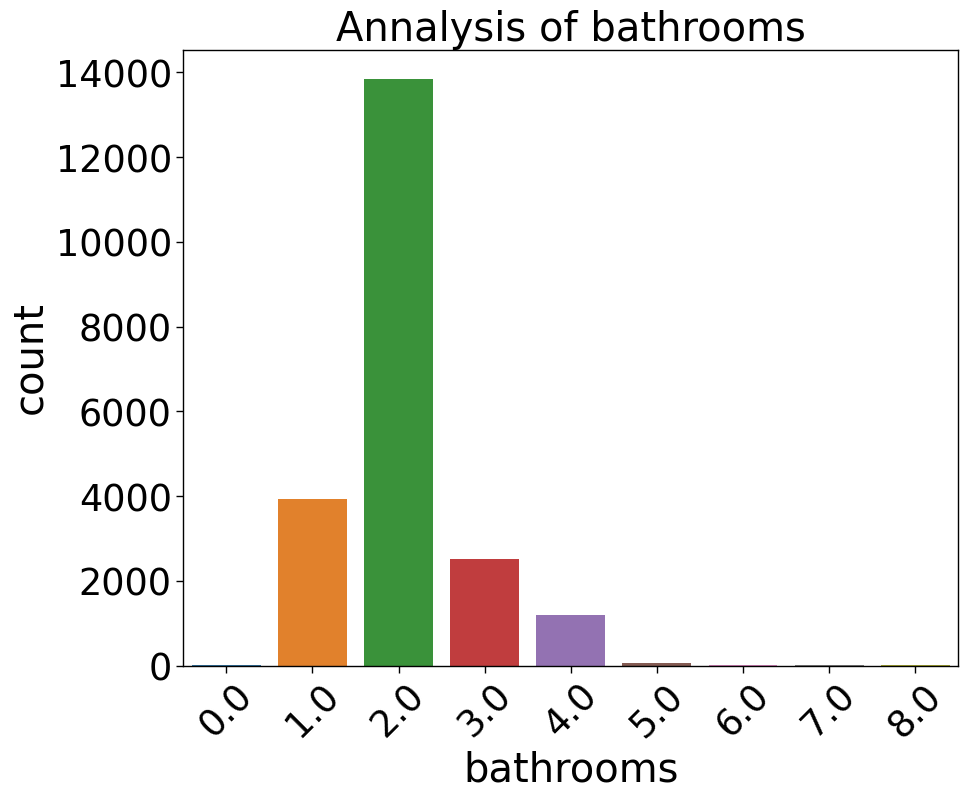

In [523]:
graph.univariate( df, 'bathrooms')

Many houses have 2 bathrooms, followed by houses with 1 bathroom , then houses with 3 bathrooms then the ones with 4 bathrooms

#### Bivariate analysis


Bivariate analysis is a statistical method for analyzing the relationship between two variables. It is used to examine the relationship between two variables to see if there is a correlation or association between them. 

### Preprocessing


In [524]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Data Transformation
df['price'] = np.log1p(df['price']) # Log-transform the target variable

scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Feature Engineering
df['room_ratio'] = df['sqft_living'] / df['bedrooms']

# Convert string values to numerical values using one-hot encoding
#df = pd.get_dummies(df, columns=["waterfront", "view", "grade","season"])

# Data Splitting
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Data Preparation
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: encoder.fit_transform(col))

### Modelling

To develop a model, correlations are very important. Because, highly correlated columns affect prices. To invest, which columns are very important in our data, we plot correlation matrix.

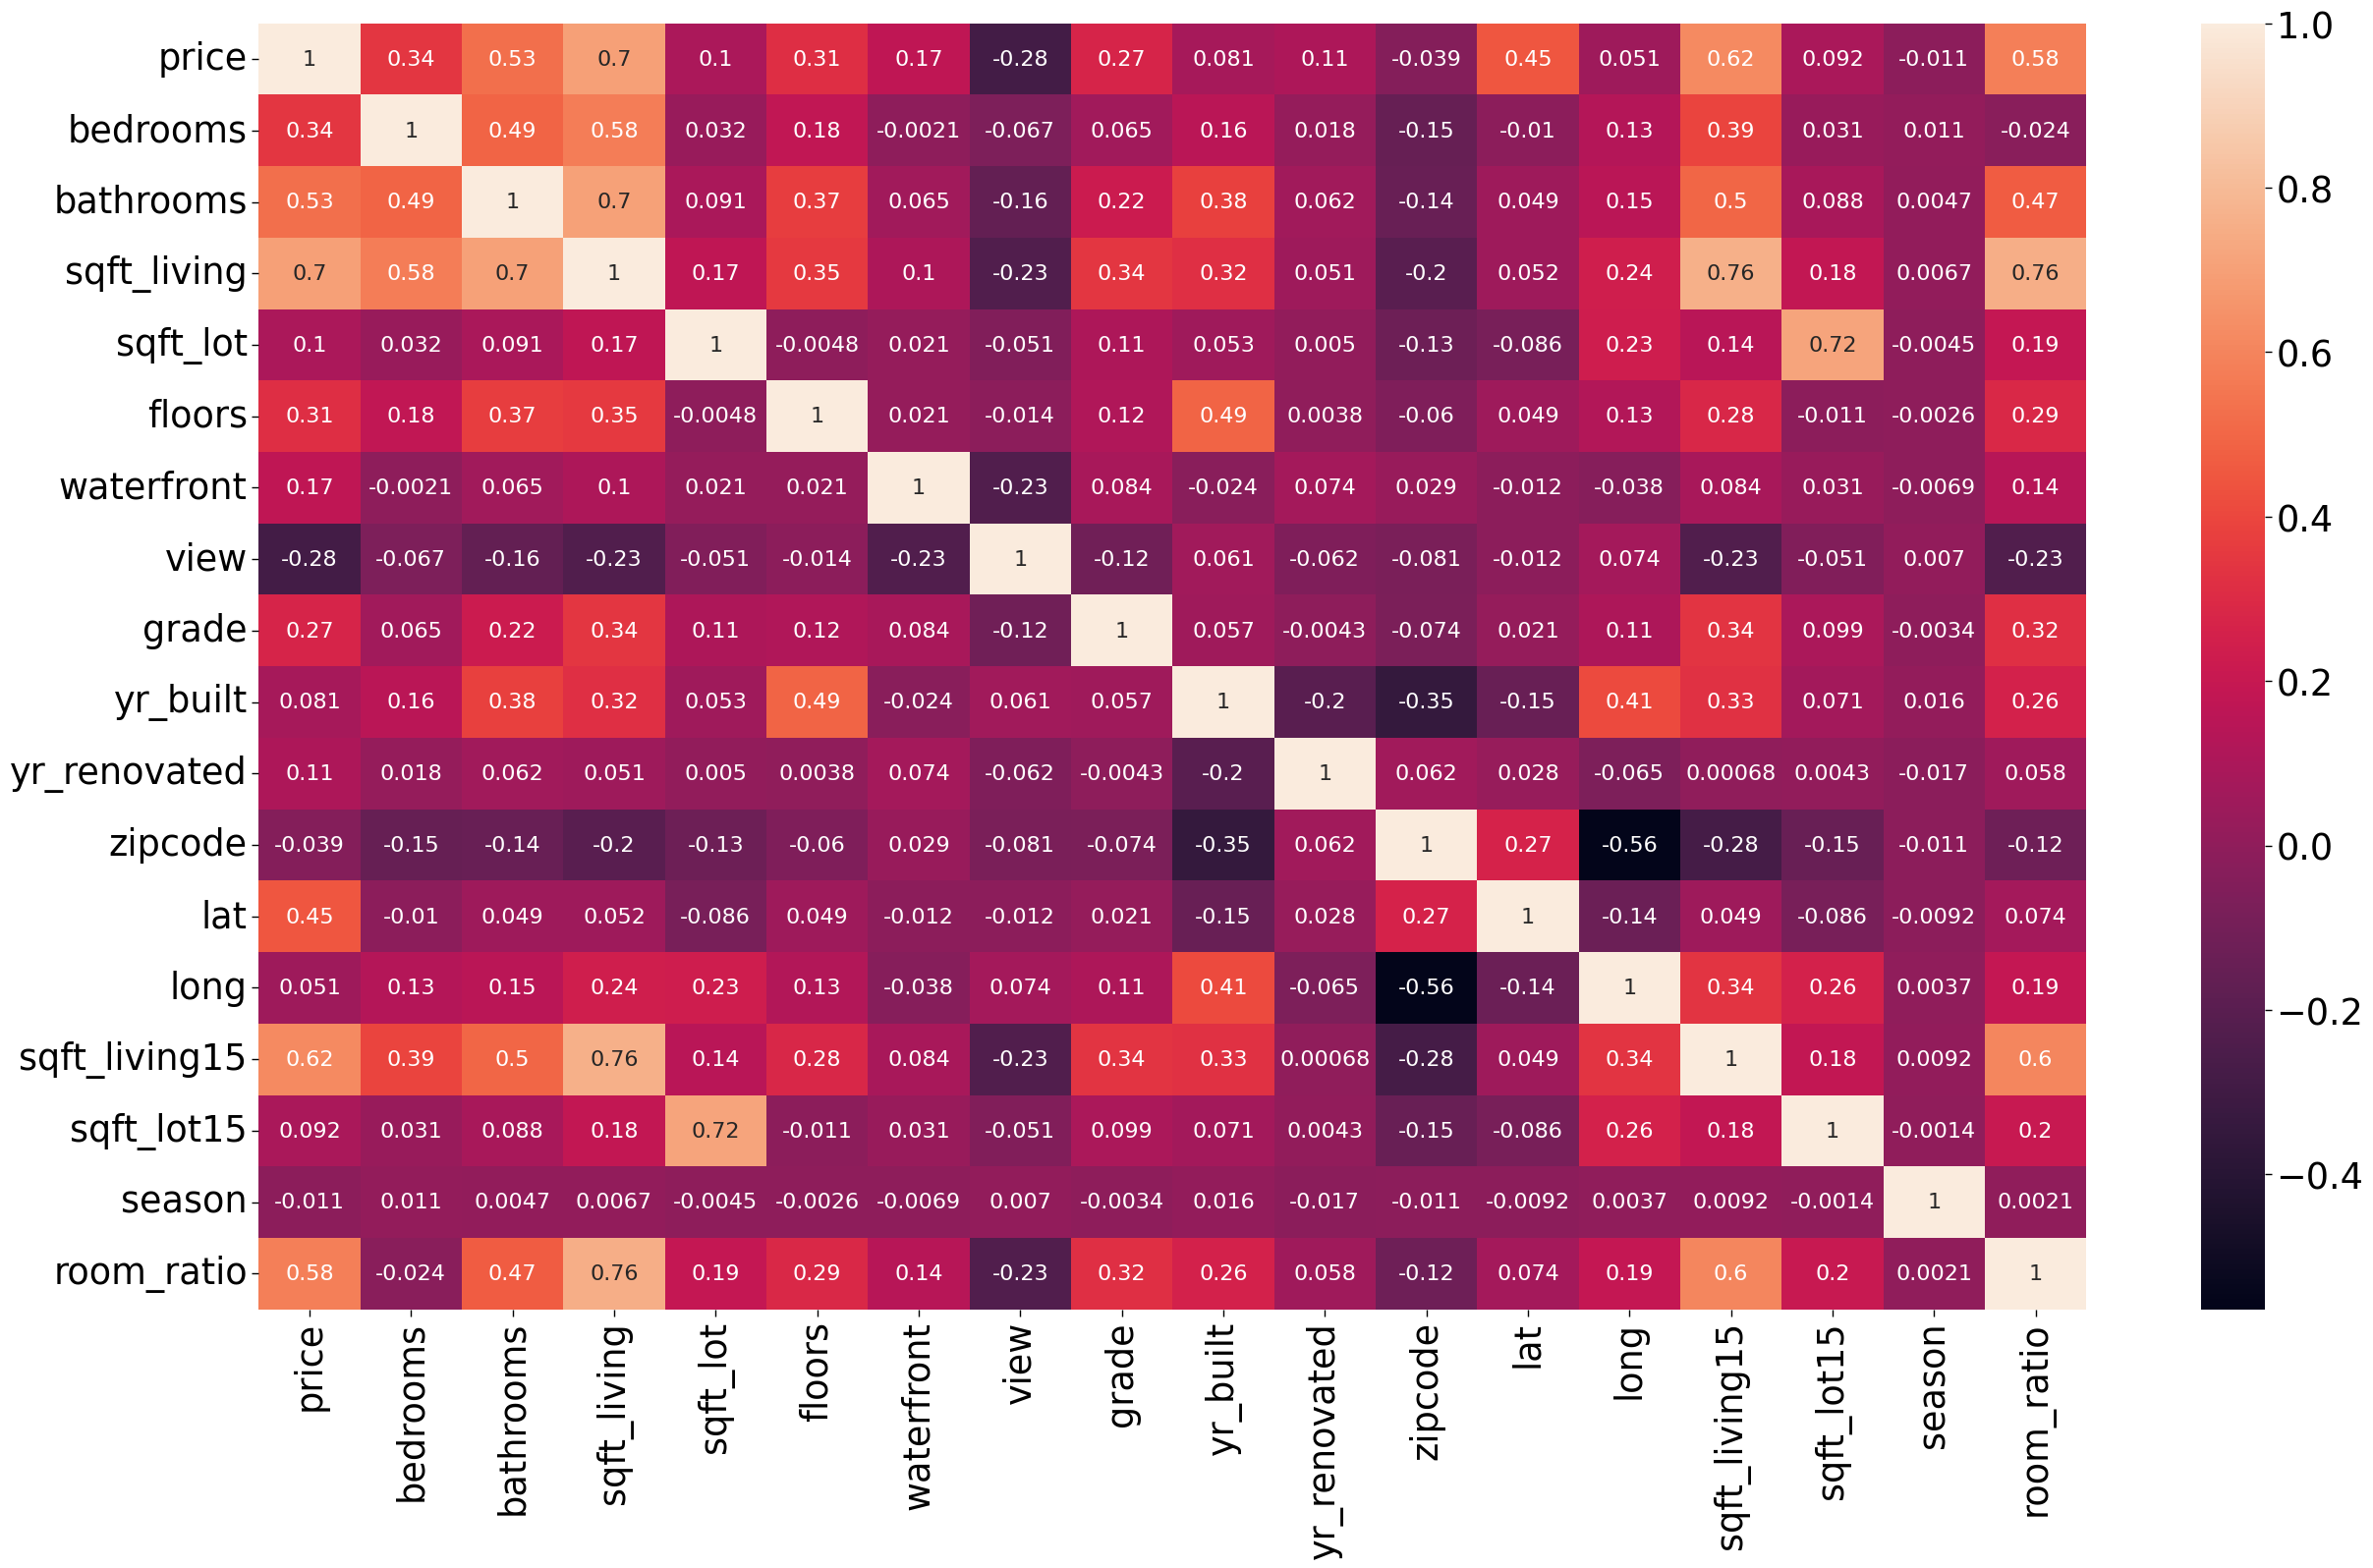

In [525]:
plt.figure(figsize=(30,17))
sns.set_context("paper", font_scale= 3)
sns.heatmap(df.corr(), annot = True, annot_kws={"size": 16})
plt.show()


From the correlation values, it is obviously seen that, living area as sqft and price are highly correlated

In [526]:
#checking the dtypes
print(df.dtypes)

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int32
view                int32
condition        category
grade               int32
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
season              int32
room_ratio        float64
dtype: object


In [527]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])


In [528]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

class RegressionModels:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def linear_regression(self):
        model = LinearRegression()
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        score = model.score(self.X_test, self.y_test)
        print("Linear Regression - R^2:", score)

    def random_forest(self):
        model = RandomForestRegressor(n_estimators=100)
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        score = model.score(self.X_test, self.y_test)
        print("Random Forest - R^2:", score)

    def xgboost(self):
        model = xgb.XGBRegressor()
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        score = model.score(self.X_test, self.y_test)
        print("XGBoost - R^2:", score)


In [529]:
models = RegressionModels(X_train, y_train, X_test, y_test)

models.linear_regression()
models.random_forest()
models.xgboost()

Linear Regression - R^2: 0.7043784138661149
Random Forest - R^2: 0.8699378531947967
XGBoost - R^2: 0.8776034300397773


#### Observations

Linear Regression: The R^2 score of 0.7044 indicates that the linear regression model explains approximately 70.44% of the variability in the test data. This score is relatively low compared to the other models.

Random Forest: The R^2 score of 0.8695 indicates that the random forest model explains approximately 86.95% of the variability in the test data. This score is significantly higher than the linear regression score, indicating that the random forest model may be a better fit for the data.

XGBoost: The R^2 score of 0.8776 indicates that the XGBoost model explains approximately 87.76% of the variability in the test data. This score is even higher than the random forest score, indicating that the XGBoost model may be the best fit for the data.

Overall, these results suggest that the XGBoost model is the best fit for the given data, followed by the random forest model and then the linear regression model.

### Evaluation

XGBoost - R^2: 0.8776034300397773
Mean Absolute Error: 0.03
Mean Squared Error: 0.00
Root Mean Squared Error: 0.04
R^2 Score: 0.88


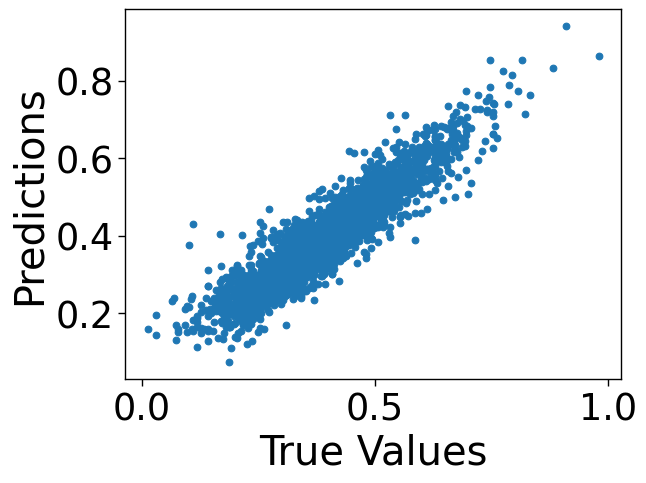

In [530]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_evaluator = RegressionModels(X_train, y_train, X_test, y_test)
# model_evaluator.linear_regression()
# model_evaluator.random_forest()
model_evaluator.xgboost()

# Get the predictions from XGBoost
xgb_model = xgb.XGBRegressor().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model with additional metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the predictions against the actual target values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


### Conclusions

The mean absolute error (MAE) is 0.03, which means that on average, the model's predictions deviate from the true values by 0.03. A low MAE value indicates a good fit of the model to the data.

The mean squared error (MSE) is 0.00, and the root mean squared error (RMSE) is 0.04. The MSE and RMSE values measure the average squared deviation of the model's predictions from the true values, and a low value indicates a good fit of the model to the data.

The R^2 score of 0.88 further confirms the model's good fit to the data. Based on these results, it can be recommended to use the XGBoost model for this regression problem.

### Saving the model
To be able to use it later without retraining

In [531]:
import pickle

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)